# **EDA**: Best Selling Novels 2009 - 2021 of Amazon

---

Books have been the medium of knowledge flow from one generation to it's next. There are around 1 million books published in each year (excluding the self-published authors), but a few of them make their way to the list of Best Sellers. There are books that stays for years and each time they are opened feels anew. And, here we'll explore some of best selling novels of Amazon from 2009 to 2021.

The dataset with top 50 best selling novels of each year from 2009 to 2021 has attributes like book name, author of the book, price, genre information, and along with number of reader reviews and ratings.

In this exploratory data analysis (EDA) notebook, we are going to check best selling books of each year, number of best selling books from each genre, books that are in top list for longest length of time and least rated books in the list. For this EDA we will be using Python Pandas, Matplotlib, and Seaborn. As this dataset is good for EDA we can also use any Business Intelligence (BI) tools or data base (DB) tools. 

Dataset: Available at [Kaggle](https://www.kaggle.com/datasets/zwl1234/top-50-bestselling-novels-20092021-of-amazon)

![](old-books-436498__340.jpg "src:Pixbay")

### Contents

1. [Import Libraries](#import-required-libraries)

2. [A detailed view of the dataset](#detailed-view-of-dataset)

3. [Handle Data types](#handle-data-types-of-attributes)

4. [Number of books in the list per genre](#number-of-books-per-genre)

5. [Top 10 Authors](#top-10-authors)

6. [Top 10 Books](#top-10-books)

7. [Genre wise Top Rated Books](#genre-wise-top-rated-books)

8. [Best Ever Books](#best-ever-books)


### Import required libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from janitor import clean_names
import warnings

# settings
pd.set_option("display.max_columns", None, "display.max_rows", None)
warnings.filterwarnings('ignore')

In [106]:
df = clean_names(pd.read_csv("amazon-bestselling-books.csv"))
df.head()

,name,author,user_rating,reviews,price,price_r,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


### Detailed view of Dataset

In [107]:
df.shape # shape of dataset

(650, 8)

In [108]:
# Check for duplicate values
df.duplicated().any()

False

In [109]:
# Check for null values
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
price_r        0
year           0
genre          0
dtype: int64

In [110]:
# Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         650 non-null    object 
 1   author       650 non-null    object 
 2   user_rating  650 non-null    float64
 3   reviews      650 non-null    object 
 4   price        650 non-null    object 
 5   price_r      650 non-null    object 
 6   year         650 non-null    int64  
 7   genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


- There are no missing values in dataset.

- No duplicate values found

_Note_: However, there are books with different editions which either can be considered as duplicates or can not be because there rating and reviews are different.

- Some attributes have misstate data types i.e. reviews, price, price_r, year. We need to address them first

### Handle data types of attributes

In [111]:
# Remove '$' and convert the price data type to float.
df.price = df.price.apply(lambda x: x[1:])
df.price = df.price.astype('float')

# remove '$' and convert the rounded price to integer
df.price_r = df.price_r.apply(lambda x: x[1:])
df.price_r = df.price_r.astype('int')

# year should be of data type year
df.year = df.year.astype('str')
df.year = pd.to_datetime(df.year).dt.year

# user rating should be of float data type
df.user_rating = df.user_rating.astype('float')

# Remove ',' from review and convert it to integer.
df.reviews = df.reviews.apply(lambda x: x.replace(',',''))
df.reviews = df.reviews.astype('int')
df.head()

,name,author,user_rating,reviews,price,price_r,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.00,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.00,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.00,15,2018,Non Fiction
3,1984,George Orwell,4.7,70425,7.48,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,6.00,6,2017,Fiction


In [112]:
# changed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         650 non-null    object 
 1   author       650 non-null    object 
 2   user_rating  650 non-null    float64
 3   reviews      650 non-null    int64  
 4   price        650 non-null    float64
 5   price_r      650 non-null    int64  
 6   year         650 non-null    int64  
 7   genre        650 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 40.8+ KB


Now everything looks good.

In [113]:
# Unique years in dataset.

df.year.unique()

array([2016, 2011, 2018, 2021, 2017, 2019, 2014, 2010, 2020, 2009, 2015,
       2013, 2012])

In [9]:
# Integrity check
# Number of books reviewed in each year. 

df.year.value_counts()

2016    50
2011    50
2018    50
2021    50
2017    50
2019    50
2014    50
2010    50
2020    50
2009    50
2015    50
2013    50
2012    50
Name: year, dtype: int64

There are actually 50 books in each year.

In [10]:
# No. of unique books
df.name.nunique()

420

In [11]:
# No. of unique authors
df.author.nunique()

292

### Number of books per Genre

In [115]:
df.genre.value_counts()

Non Fiction    363
Fiction        287
Name: genre, dtype: int64

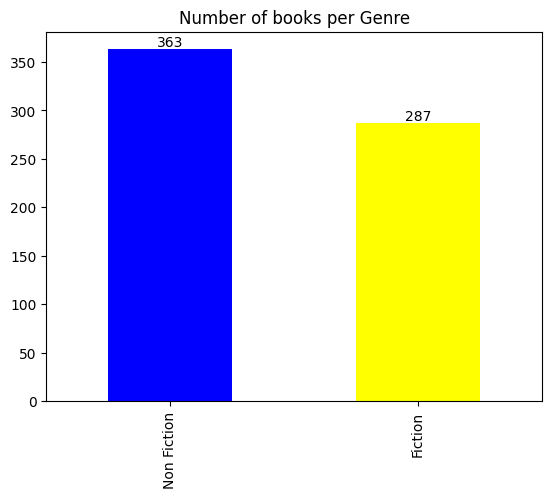

In [114]:
fig, ax = plt.subplots()
ax = df.genre.value_counts().plot(kind='bar', color=['blue', 'yellow'])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Number of books per Genre")
plt.show()


Non Fiction books are performing better than fiction.

### Top 10 Authors:

#### Based on number of times their books in top list

In [100]:
# Top 10 authors based on number of times their books in top list
df.author.value_counts().head(10)

Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
Dr. Seuss                             10
Dav Pilkey                             9
Eric Carle                             9
Gallup                                 9
Stephenie Meyer                        8
Name: author, dtype: int64

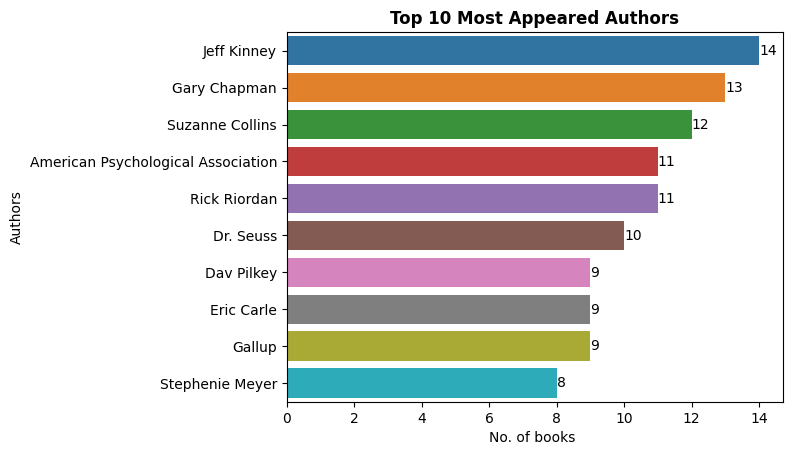

In [103]:
ax = sns.barplot(
    data = df.author.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'author'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of books ')
plt.ylabel('Authors')

plt.title("Top 10 Most Appeared Authors", weight='bold')
plt.show()

'Jeff Kinney', 'Gray Chapman', and 'Suzanne Collins' are top best selling authors.

#### Year wise top 3 authors

In [14]:
# Group by  the data based on author count and year
num_data = pd.DataFrame(df.groupby(['year','author']).author.count())
# Rename new column to count
num_data.rename(columns = {"author":'count'}, inplace=True)
num_data = num_data.reset_index()
# sort hte data based on count in descending order
num_data = num_data.sort_values(by='count', ascending=False)

# again groupby based on year and find top 3 books of each year.
num_data = num_data.groupby('year').head(3).reset_index(drop=True)
# Sort the data based on year.
num_data = num_data.sort_values(by='year', ascending=True)

In [15]:
# output
# Top 3 authors from each year
num_data

,year,author,count
0,2009,Stephenie Meyer,6
12,2009,Charlaine Harris,2
15,2009,David Zinczenko,2
4,2010,Rick Riordan,4
7,2010,Stieg Larsson,3
10,2010,Suzanne Collins,3
2,2011,Suzanne Collins,4
29,2011,Kathryn Stockett,2
20,2011,Rick Riordan,2
1,2012,E L James,4


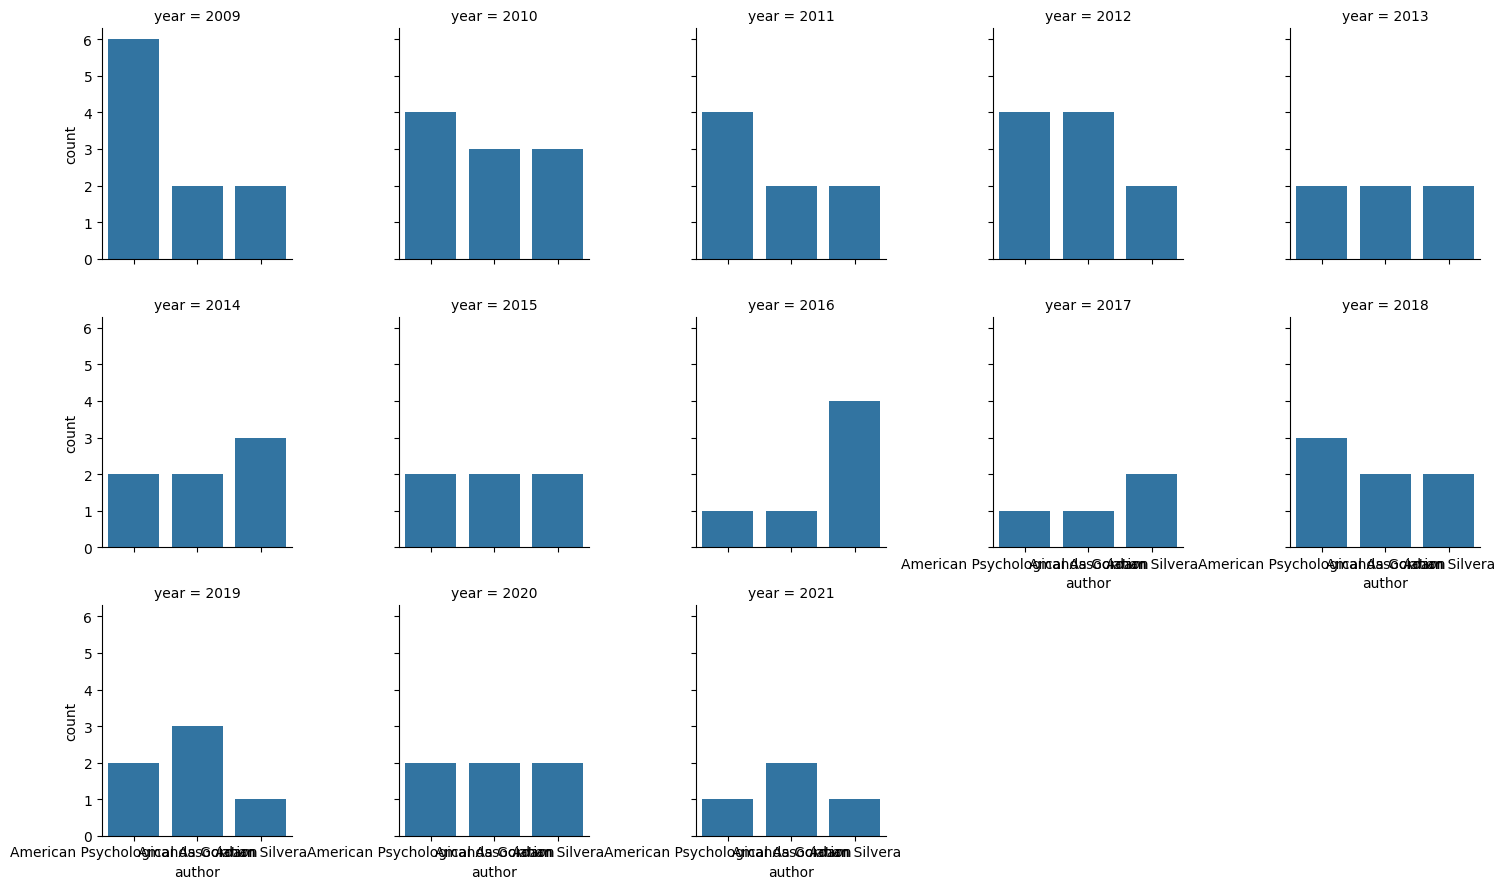

In [95]:
g = sns.FacetGrid(num_data, col='year', col_wrap=5, height=3)
g.map(sns.barplot, "author", "count")
plt.show()

#### Top 3 Books from each year Based on reviews.

Procedure is similar to above cell.

In [17]:
num_data2 = pd.DataFrame(df.groupby(['year','name']).reviews.max()) # groupby based on year, name, and maximum reviews

num_data2 = num_data2.reset_index() 
num_data2 = num_data2.sort_values(by='reviews', ascending=False) # sort in descending order based on review
num_data2 = num_data2.groupby('year').head(3).reset_index(drop=True) # find top 3 books from each year
num_data2 = num_data2.sort_values(by='year', ascending=True) # sort based on year in descending order
num_data2

,year,name,reviews
38,2009,"Twilight (The Twilight Saga, Book 1)",11676
36,2009,The Shack: Where Tragedy Confronts Eternity,19720
37,2009,The Help,13871
31,2010,Mockingjay (The Hunger Games),26741
28,2010,"Unbroken: A World War II Story of Survival, Re...",29673
23,2010,The Hunger Games,32122
32,2011,Mockingjay (The Hunger Games),26741
27,2011,"Unbroken: A World War II Story of Survival, Re...",29673
24,2011,The Hunger Games (Book 1),32122
20,2012,Fifty Shades of Grey: Book One of the Fifty Sh...,47265


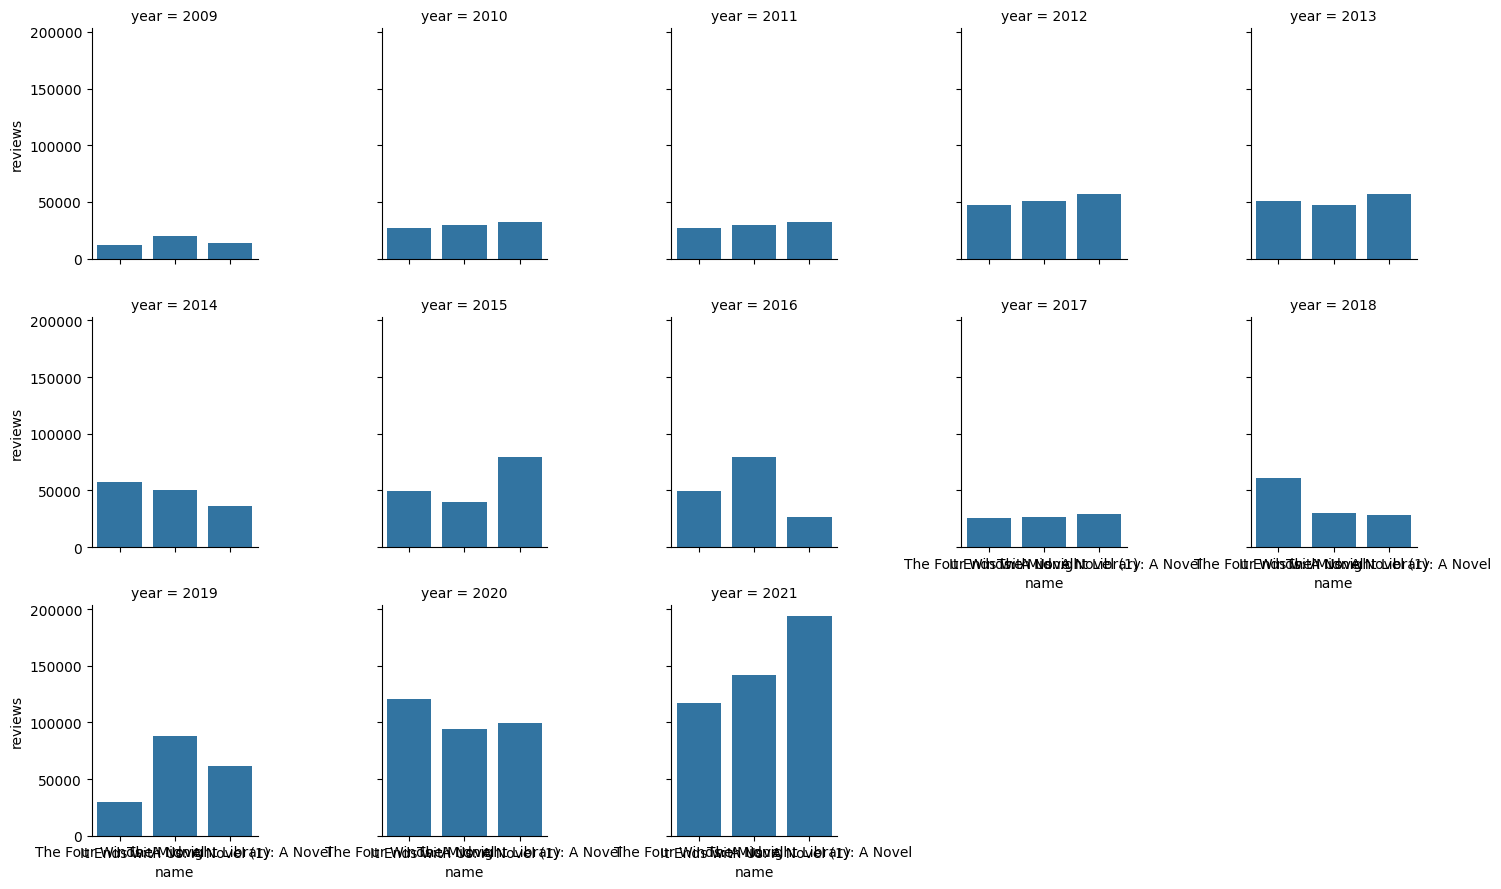

In [94]:
g = sns.FacetGrid(num_data2, col='year', col_wrap=5, height=3)
g.map(sns.barplot, "name", "reviews")
plt.show()

### Top 10 books

There are two parameters in the dataset i.e. number of reviews and user_rating based on which we can determine the popularity of a book. Though rating will be more exact to determine the popularity of a book but we can't ignore the number of reviews as well. So, we'll have to consider both the cases.

#### Based on reader rating

In [23]:
rating_wise = pd.DataFrame(df.groupby(['name', 'author']).user_rating.mean()) # Group by name, author, based on user_rating.
rating_wise.reset_index(inplace=True)
rating_wise = rating_wise.sort_values(by='user_rating', ascending=False) # sort values in descending order based on rating
rating_wise.head(11) # fetch top 10 books. 'The wonderful Things you will be appeared twice, hence fetched 11 books.

,name,author,user_rating
210,Obama: An Intimate Portrait,Pete Souza,4.9
39,Big Shot (Diary of a Wimpy Kid,Jeff Kinney,4.9
374,The Wonderful Things You Will BeThe Wonderful ...,Emily Winfield Martin,4.9
373,The Wonderful Things You Will Be,Emily Winfield Martin,4.9
132,Hamilton: The Revolution,Lin-Manuel Miranda,4.9
236,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9
156,I Love You to the Moon and Back,Amelia Hepworth,4.9
237,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9
152,Humans of New York : Stories,Brandon Stanton,4.9
327,The Magnolia Story,Chip Gaines,4.9


#### Based on number of reader reviews

In [104]:
review_wise = pd.DataFrame(df.groupby(['name', 'author']).reviews.mean()).reset_index() # group by name, author and mean of reviews.
review_wise = review_wise.sort_values(by='reviews', ascending=False) # sort based on reviews 
review_wise.head(11)

,name,author,reviews
332,The Midnight Library: A Novel,Matt Haig,193482.0
164,It Ends with Us: A Novel (1),Colleen Hoover,141748.0
294,The Four Winds: A Novel,Kristin Hannah,117146.0
352,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,111053.0
319,The Last Thing He Told Me: A Novel,Laura Dave,107449.0
410,Where the Crawdads Sing,Delia Owens,104284.0
386,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,94196.0
265,"The Alchemist, 25th Anniversary: A Fable About...",Paulo Coelho,91743.0
235,Rich Dad Poor Dad: What the Rich Teach Their K...,Robert T. Kiyosaki,90390.0
12,A Promised Land,Barack Obama,83212.0


### Genre wise Top Rated Books

#### User review wise

In [55]:
# Based on reviews
genre_reviews = pd.DataFrame(df.groupby(['name', 'author', 'genre']).reviews.mean()).reset_index()
genre_reviews = genre_reviews.sort_values(by='reviews', ascending=False)
genre_reviews.head(11)

,name,author,genre,reviews
332,The Midnight Library: A Novel,Matt Haig,Fiction,193482.0
164,It Ends with Us: A Novel (1),Colleen Hoover,Fiction,141748.0
294,The Four Winds: A Novel,Kristin Hannah,Fiction,117146.0
352,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,Fiction,111053.0
319,The Last Thing He Told Me: A Novel,Laura Dave,Fiction,107449.0
411,Where the Crawdads Sing,Delia Owens,Fiction,104284.0
387,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,Non Fiction,94196.0
265,"The Alchemist, 25th Anniversary: A Fable About...",Paulo Coelho,Fiction,91743.0
235,Rich Dad Poor Dad: What the Rich Teach Their K...,Robert T. Kiyosaki,Non Fiction,90390.0
12,A Promised Land,Barack Obama,Non Fiction,83212.0


In [57]:
# Extract data for fiction and non fiction genres
genre_reviews_fictions = genre_reviews.loc[genre_reviews.genre=='Fiction']
genre_reviews_non_fiction = genre_reviews.loc[genre_reviews.genre=='Non Fiction']

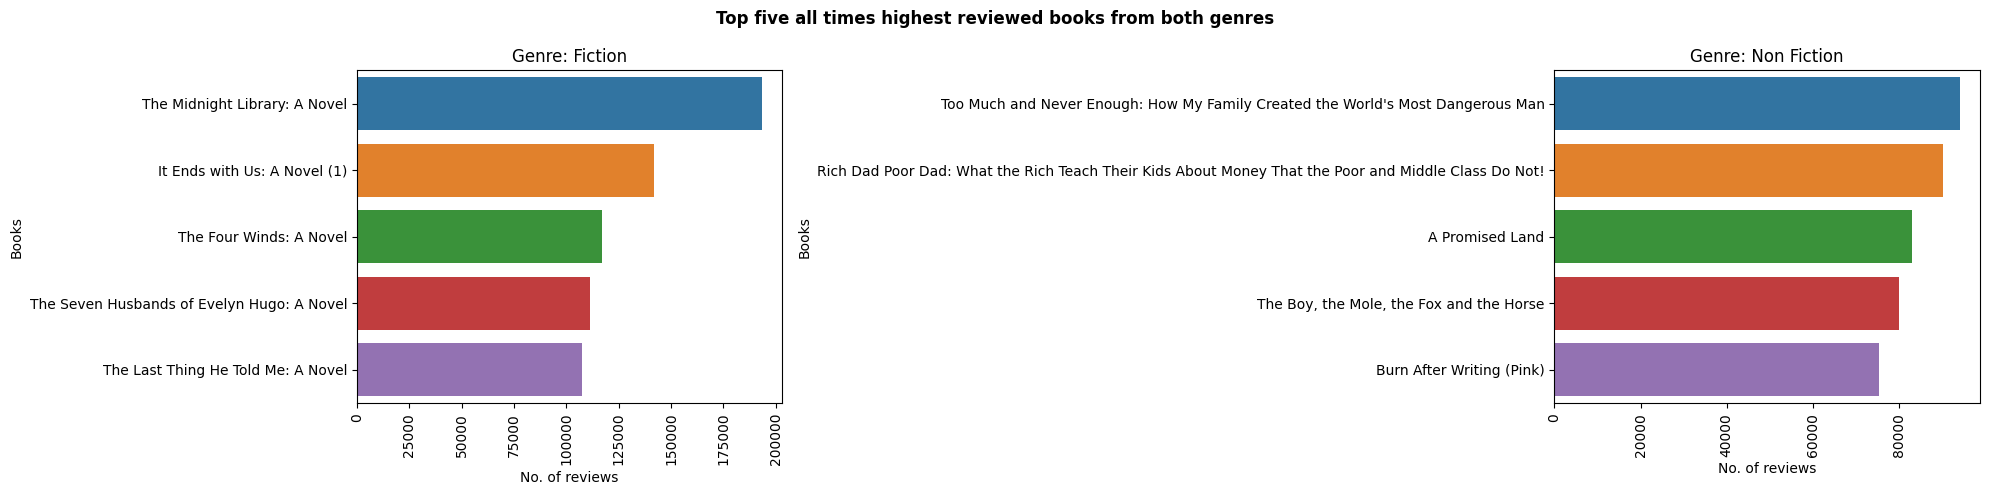

In [80]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Top five all times highest reviewed books from both genres', weight='bold')

plt.subplot(1,2,1)
fiction = sns.barplot(data=genre_reviews_fictions.head(), x='reviews', y='name')
plt.xticks(rotation=90)
plt.title("Genre: Fiction")
plt.xlabel('No. of reviews')
plt.ylabel("Books")

plt.subplot(1,2,2)
fiction = sns.barplot(data=genre_reviews_non_fiction.head(), x='reviews', y='name')
plt.xticks(rotation=90)
plt.title("Genre: Non Fiction")
plt.xlabel("No. of reviews")
plt.ylabel("Books")


plt.tight_layout()
plt.show()

The left side are top five fiction books with highest reviews and in right are top five highest reviewed non Fiction books.

#### Customer rating wise

In [81]:
genre_rating = pd.DataFrame(df.groupby(['name', 'author', 'genre']).user_rating.mean()).reset_index() # Group by data based on user ratings
genre_rating = genre_rating.sort_values(by='user_rating', ascending=False)
genre_rating.head(11)

,name,author,genre,user_rating
210,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9
126,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9
53,Chicka Chicka Boom Boom,Bill Martin Jr.,Fiction,4.9
327,The Magnolia Story,Chip Gaines,Non Fiction,4.9
320,The Legend of Zelda: Hyrule Historia,Patrick Thorpe,Fiction,4.9
79,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9
80,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,Fiction,4.9
81,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,Fiction,4.9
82,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9
83,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,Fiction,4.9


In [91]:
genre_rating.groupby('genre').head(5) # Top rated 5 books from both the genres

,name,author,genre,user_rating
210,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9
126,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9
53,Chicka Chicka Boom Boom,Bill Martin Jr.,Fiction,4.9
327,The Magnolia Story,Chip Gaines,Non Fiction,4.9
320,The Legend of Zelda: Hyrule Historia,Patrick Thorpe,Fiction,4.9
79,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9
80,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,Fiction,4.9
132,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9
152,Humans of New York : Stories,Brandon Stanton,Non Fiction,4.9
167,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9


### Best Ever books

Books that were in best selling list for longest length of time

In [34]:
total_number_of_years = 2021-2009
total_number_of_years # Total number of years 

12

In [38]:
df1 = df[['name', 'year', 'genre']] # create a new Dataframe with name, year, and genre only

df1['times'] = 1 # create a new column stating each book individually counts 1 instance

books = df1.groupby('name').times.count().reset_index() # group the books based on number of times they appeared in dataset.
books = books.sort_values(by='times', ascending=False) # now sort the data based on number of times they appeared in descending order.
books.head(10) # fetch top 10 books.

,name,times
229,Publication Manual of the American Psychologic...,10
371,The Very Hungry Caterpillar,9
211,"Oh, the Places You'll Go!",9
252,StrengthsFinder 2.0,9
261,The 5 Love Languages: The Secret to Love that ...,7
263,The 7 Habits of Highly Effective People: Power...,7
114,Giraffes Can't Dance,6
167,Jesus Calling: Enjoying Peace in His Presence ...,6
148,How to Win Friends & Influence People,6
293,The Four Agreements: A Practical Guide to Pers...,6


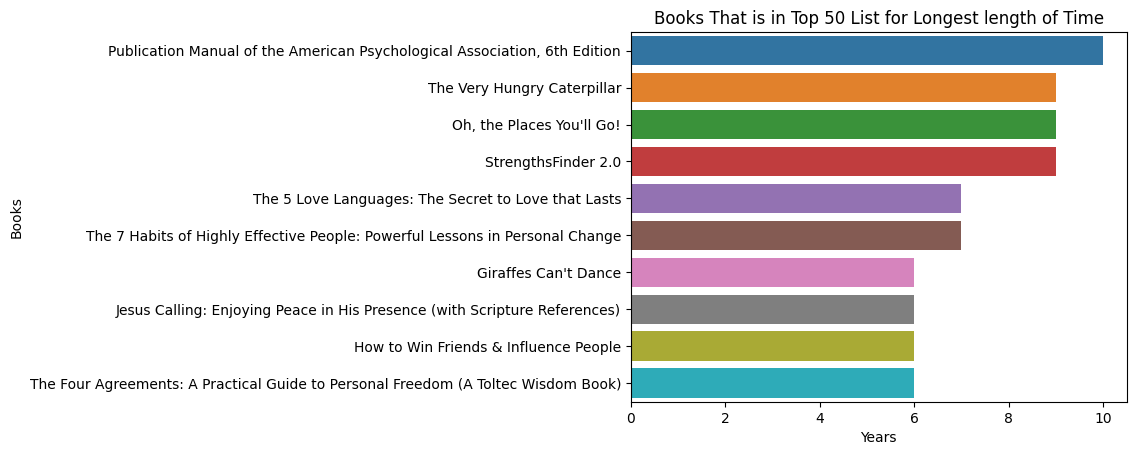

In [46]:
sns.barplot(
    data=books.head(10),
    y ='name',
    x = 'times'
)
#plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Books')
plt.title("Books That are in top 50 List for longest length of Time in 12 years")
plt.show()

Top 10 books that are frequently appeared in the list (Best ever books).
